<a href="https://colab.research.google.com/github/jodekpotasu/classification42/blob/main/Projekt_praktyczny_2_poprawki.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving attrition.csv to attrition (2).csv


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving df1.csv to df1 (1).csv


In [ ]:
# import files from computer - x_test, y_test, x_train, y_train
from google.colab import files
uploaded = files.upload()

Saving df2.csv to df2 (1).csv


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving sample_output.csv to sample_output (1).csv


In [ ]:
import pandas as pd
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.svm import SVC

In [ ]:
data = pd.read_csv("attrition.csv")
data.head()

,EmployeeNumber,Attrition
0,104,No
1,1638,No
2,164,No
3,395,No
4,53,No


In [ ]:
df1 = pd.read_csv("df1.csv")
df1.head()

,EmployeeNumber,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked
0,104,30.0,Travel_Rarely,852.0,Research & Development,1.0,1.0,Life Sciences,1.0,4.0,Male,55.0,2.0,2.0,Laboratory Technician,4.0,Married,5126.0,15998.0,1.0
1,1638,38.0,Travel_Rarely,397.0,Research & Development,2.0,2.0,Medical,1.0,4.0,Female,54.0,2.0,3.0,Manufacturing Director,3.0,Married,7756.0,14199.0,3.0
2,164,26.0,Travel_Rarely,841.0,Research & Development,6.0,3.0,Other,1.0,3.0,Female,46.0,2.0,1.0,Research Scientist,2.0,Married,2368.0,23300.0,1.0
3,395,28.0,Travel_Rarely,1117.0,Research & Development,8.0,2.0,Life Sciences,1.0,4.0,Female,66.0,3.0,1.0,Research Scientist,4.0,Single,3310.0,4488.0,1.0
4,53,35.0,Travel_Rarely,464.0,Research & Development,4.0,2.0,Other,1.0,3.0,Male,75.0,3.0,1.0,Laboratory Technician,4.0,Divorced,1951.0,10910.0,1.0


In [ ]:
df2 = pd.read_csv("df2.csv")
df2.head()

,EmployeeNumber,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,YearlyIncome
0,104,Y,Yes,12.0,3.0,3.0,80.0,2.0,10.0,1.0,2.0,10.0,8.0,3.0,0.0,No,61512.0
1,1638,Y,Yes,19.0,3.0,4.0,80.0,1.0,10.0,6.0,4.0,5.0,4.0,0.0,2.0,No,93072.0
2,164,Y,No,19.0,3.0,3.0,80.0,0.0,5.0,3.0,2.0,5.0,4.0,4.0,3.0,No,28416.0
3,395,Y,No,21.0,4.0,4.0,80.0,0.0,5.0,3.0,3.0,5.0,3.0,0.0,2.0,No,39720.0
4,53,Y,No,12.0,3.0,3.0,80.0,1.0,1.0,3.0,3.0,1.0,0.0,0.0,0.0,No,23412.0


In [ ]:
sample = pd.read_csv("sample_output.csv")
sample.head()

,EmployeeNumber,Attrition
0,100000,1
1,100001,1
2,100002,1
3,100003,1
4,100004,1


In [ ]:
df1 = pd.get_dummies (df1)

In [ ]:
import sklearn
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df1)
x = scaler.transform(df1)

In [ ]:
df12 = pd.DataFrame(data=x)
df13 = pd.concat([df12, data], axis=1)

df14 = df13.dropna()

df14.count()
cleaneddata = df14

In [ ]:
df2 = pd.get_dummies (df2)
xdopred = scaler.transform(df2)

ValueError: ignored

In [ ]:
Q1 = cleaneddata.quantile(0.25)
Q3 = cleaneddata.quantile(0.75)
IQR = Q3 - Q1
data_filtered = cleaneddata[~((cleaneddata < (Q1 - 1.5 * IQR)) | (cleaneddata > (Q3 + 1.5 * IQR))).any(axis=1)]
data_filtered

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,EmployeeNumber,Attrition


In [ ]:
#plt.subplots(figsize=(10,8))
#ax = plt.axes()
#ax.set_title("Attrition Heatmap")
#corr = data_filtered.corr()
#sns.heatmap(corr, 
         #   xticklabels=corr.columns.values,
          #  yticklabels=corr.columns.values, cmap="Blues",linewidths=.5)

In [ ]:
#YN_mapping = {"Yes": 1, "No": 0}

In [ ]:
#data_filtered.loc['Attrition'] = data_filtered.loc['Attrition'].map(YN_mapping)

In [ ]:
#w= data_filtered.loc['Attrition'].map(YN_mapping)

In [ ]:
#print(w)

In [ ]:
data_filtered.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,EmployeeNumber,Attrition


In [ ]:
cleaneddata=data_filtered

In [ ]:
y = cleaneddata['Attrition']

In [ ]:
x = cleaneddata.iloc[:,:-1]

/usr/local/lib/python3.6/dist-packages/seaborn/matrix.py:204: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
/usr/local/lib/python3.6/dist-packages/seaborn/matrix.py:209: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


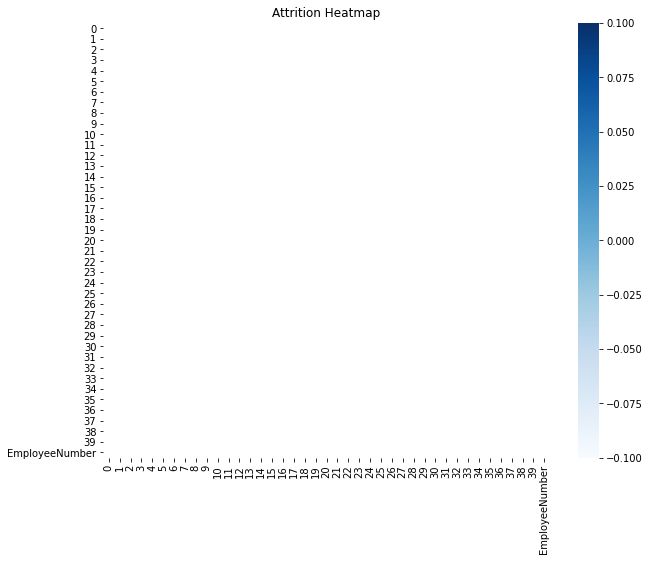

In [ ]:
plt.subplots(figsize=(10,8))
ax = plt.axes()
ax.set_title("Attrition Heatmap")
corr = x.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values, cmap="Blues",linewidths=.5)

/usr/local/lib/python3.6/dist-packages/seaborn/matrix.py:204: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
/usr/local/lib/python3.6/dist-packages/seaborn/matrix.py:209: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


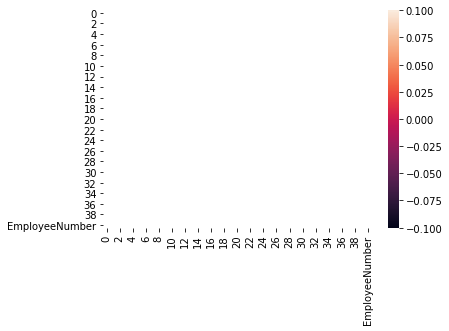

In [ ]:
corr = x.corr()
sns.heatmap(corr)

/usr/local/lib/python3.6/dist-packages/seaborn/matrix.py:204: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
/usr/local/lib/python3.6/dist-packages/seaborn/matrix.py:209: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


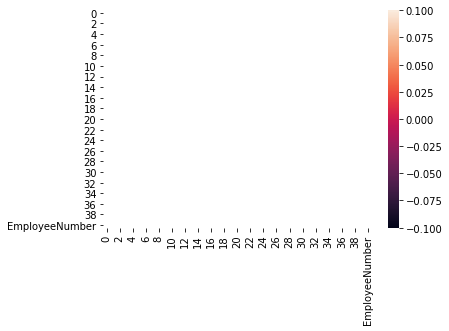

In [ ]:
corr = cleaneddata.corr()
sns.heatmap(corr)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y)

ValueError: ignored

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
# Create and fit the model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
# Predict on the test features, print the results
pred = knn.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# average:
#   None - wyniki dla każdej klasy osobno
#   'binary' - dla wybranej w `pos_label` etykiety
#   'micro' - dla całkowitej liczby TP, FN, FP
#   'macro' - nieważona średnia dla każdej klasy
#   'weighted' - ważona średnia dla każdej klasy
def calculate_metrics(target, prediction, average='micro'):
    accuracy = accuracy_score(target, prediction)
    precision = precision_score(target, prediction, average=average)
    recall = recall_score(target, prediction, average=average)
    f1 = f1_score(target, prediction, average=average)
    mislabeled = (target != prediction).sum()
    total = len(target)
    return accuracy, precision, recall, f1, mislabeled, total
def print_results(metrics, classifier_id='classifier'):
    print(f'Results for {classifier_id}')
    print('----')
    print(f'  Accuracy:  {metrics[0]}')
    print(f'  Precision: {metrics[1]}')
    print(f'  Recall:    {metrics[2]}')
    print(f'  F1 score:  {metrics[3]}')
    print(f'  Mislabeled {metrics[4]} out of {metrics[5]}')
    print('\n')

In [ ]:
print_results(calculate_metrics(y_test, pred), 'kNN')

Results for kNN
----
  Accuracy:  0.6598240469208211
  Precision: 0.6598240469208211
  Recall:    0.6598240469208211
  F1 score:  0.6598240469208211
  Mislabeled 116 out of 341




In [ ]:
import pandas as pd
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.svm import SVC

              precision    recall  f1-score   support

          No       0.69      0.72      0.70       191
         Yes       0.62      0.58      0.60       150

    accuracy                           0.66       341
   macro avg       0.65      0.65      0.65       341
weighted avg       0.66      0.66      0.66       341



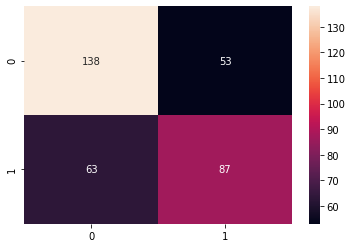

In [ ]:
cm = confusion_matrix(y_test, pred)
sns.heatmap(cm, annot=True, fmt='d')
print(classification_report(y_test, pred))

In [ ]:
from sklearn.model_selection import StratifiedKFold
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
for train, test in cv.split(x, y):
  X_train_kfold, y_train_kfold = x.iloc[train], y.iloc[train]
  X_test_kfold, y_test_kfold = x.iloc[test], y.iloc[test]

ValueError: ignored

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
params_knn = {
    'n_neighbors': [2, 3, 5, 7, 10, 15],
    'metric': ['euclidean', 'manhattan', 'chebyshev', 'minkowski'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree']
}
clf  = GridSearchCV(KNeighborsClassifier(), params_knn)
clf.fit(X_train_kfold, y_train_kfold)
clf.best_params_

{'algorithm': 'auto', 'metric': 'manhattan', 'n_neighbors': 10}

In [ ]:
knn = KNeighborsClassifier(algorithm= 'ball_tree', metric= 'manhattan', n_neighbors= 2)

In [ ]:
knn = KNeighborsClassifier(algorithm= 'auto', metric= 'manhattan', n_neighbors= 15)

In [ ]:
knn.fit(X_train_kfold, y_train_kfold)
y_pred_kfold = knn.predict(X_test_kfold)

In [ ]:
print_results(calculate_metrics(y_test_kfold, y_pred_kfold), 'kNN for KFold')

Results for kNN for KFold
----
  Accuracy:  0.7558823529411764
  Precision: 0.7558823529411764
  Recall:    0.7558823529411764
  F1 score:  0.7558823529411764
  Mislabeled 83 out of 340




In [ ]:
knn.fit(X_train_kfold, y_train_kfold)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='manhattan',
                     metric_params=None, n_jobs=None, n_neighbors=15, p=2,
                     weights='uniform')

In [ ]:
df22=df2.loc['Attrition']

KeyError: ignored

In [ ]:
y_pred = knn.predict(df2)
y_pred.to_csv(index=False)

In [ ]:

y_pred_kfold_csv = pd.DataFrame(data=y_pred_kfold)
y_pred_kfold_csv('y_pred.csv', index = False)
from google.colab import files
files.download('y_pred.csv')

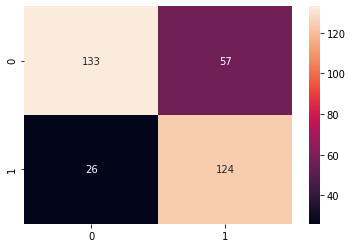

In [ ]:
cm = confusion_matrix(y_test_kfold, y_pred_kfold)
sns.heatmap(cm, annot=True, fmt='d')

In [ ]:
model = SVC(C=0.01, class_weight=None, kernel="rbf")
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          No       0.81      0.66      0.73       191
         Yes       0.65      0.80      0.72       150

    accuracy                           0.72       341
   macro avg       0.73      0.73      0.72       341
weighted avg       0.74      0.72      0.72       341



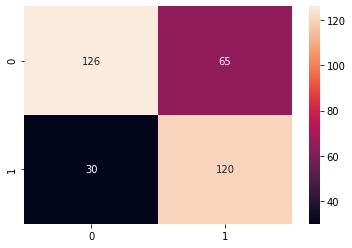

In [ ]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')

SVC
              precision    recall  f1-score   support

          No       0.81      0.66      0.73       191
         Yes       0.65      0.80      0.72       150

    accuracy                           0.72       341
   macro avg       0.73      0.73      0.72       341
weighted avg       0.74      0.72      0.72       341



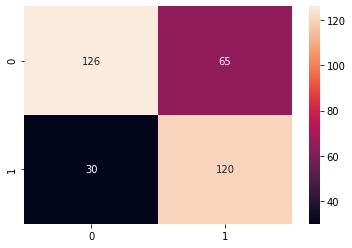

KNeighborsClassifier
              precision    recall  f1-score   support

          No       0.69      0.72      0.70       191
         Yes       0.62      0.58      0.60       150

    accuracy                           0.66       341
   macro avg       0.65      0.65      0.65       341
weighted avg       0.66      0.66      0.66       341



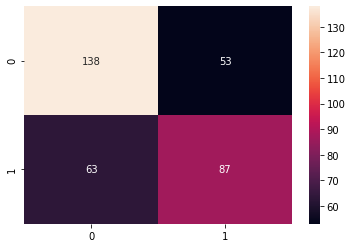

DecisionTreeClassifier
              precision    recall  f1-score   support

          No       1.00      1.00      1.00       191
         Yes       1.00      1.00      1.00       150

    accuracy                           1.00       341
   macro avg       1.00      1.00      1.00       341
weighted avg       1.00      1.00      1.00       341



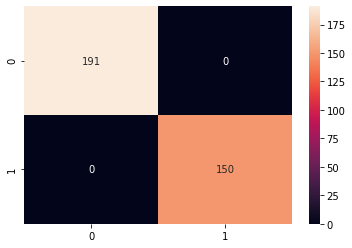

In [ ]:
from matplotlib import pyplot as plt
from sklearn.tree import DecisionTreeClassifier
classifiers = [SVC, KNeighborsClassifier, DecisionTreeClassifier]
for classifier_class in classifiers:
    model = classifier_class()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(model.__class__.__name__)
    print(classification_report(y_test, y_pred))
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d')
    plt.show()

In [ ]:
from sklearn.tree import plot_tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [ ]:
def get_grid(data):
    x_min, x_max = data[:, 0].min() - 1, data[:, 0].max() + 1
    y_min, y_max = data[:, 1].min() - 1, data[:, 1].max() + 1
    return np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

In [ ]:
clf = DecisionTreeClassifier()

clf.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

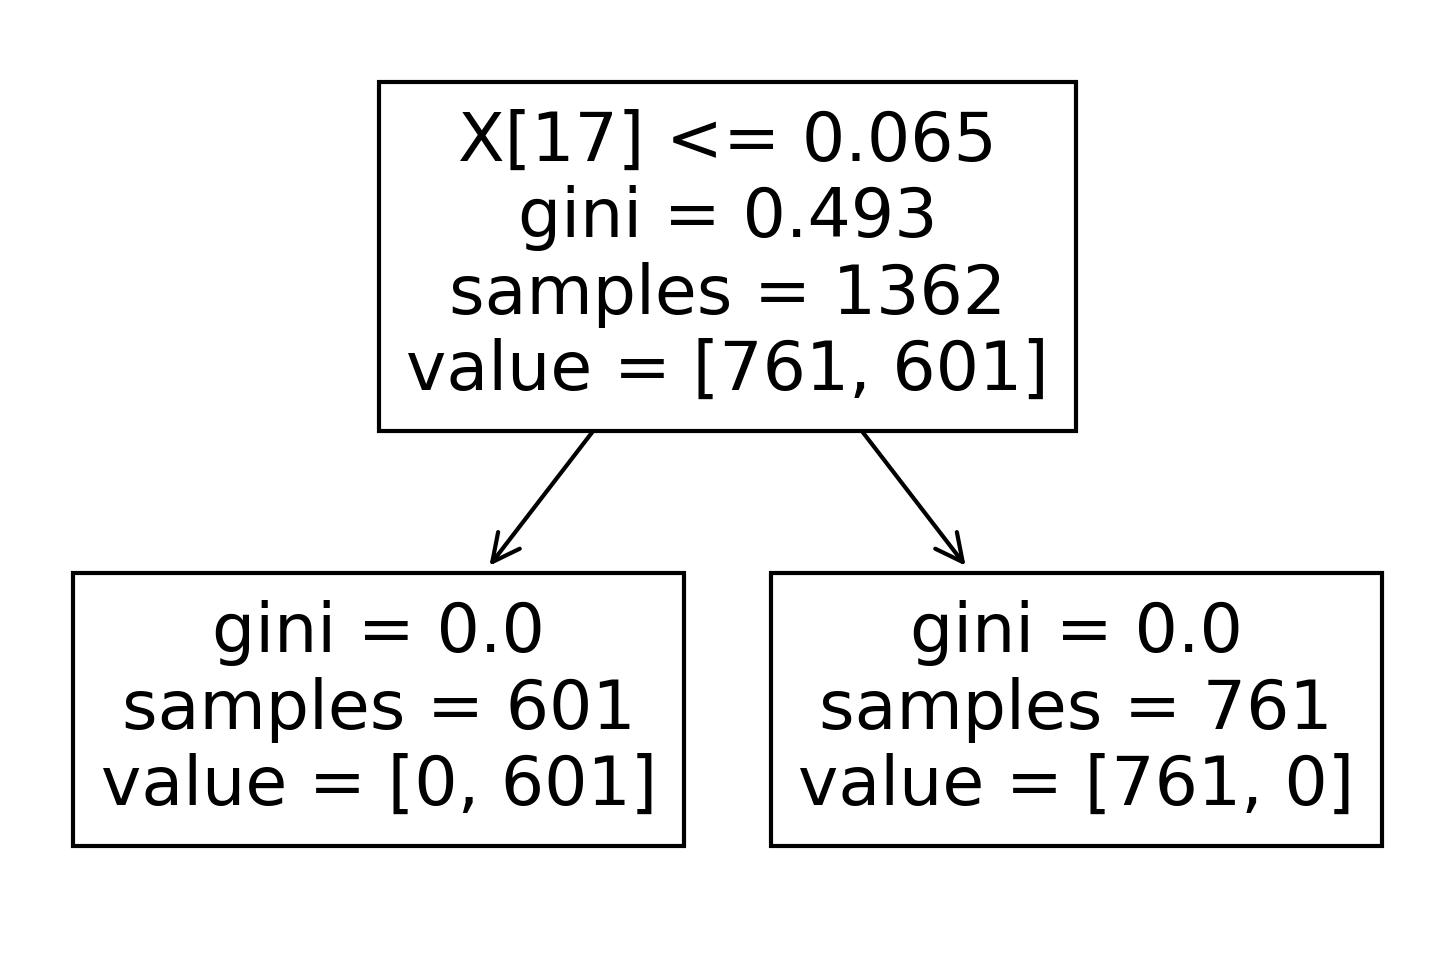

In [ ]:
plt.figure(dpi=300)
plot_tree(clf)
plt.show()

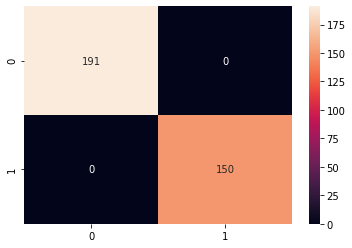

In [ ]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')

In [ ]:
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
y_dt = clf.predict(X_test)

Results for Decision Tree train
----
  Accuracy:  1.0
  Precision: 1.0
  Recall:    1.0
  F1 score:  1.0
  Mislabeled 0 out of 1362




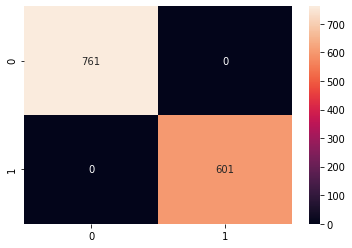

In [ ]:
y_dt_train =  clf.predict(X_train)
print_results(calculate_metrics(y_train.values, y_dt_train), 'Decision Tree train')
cm = confusion_matrix(y_train, y_dt_train)
sns.heatmap(cm, annot=True, fmt='d')


In [ ]:
def plot_confusion_matrix(confusion_matrix, classes, title=None,
                          title_appendix='',
                          cmap=plt.cm.Blues):
    # tytuł wykresu
    if title_appendix:
        title_appendix = f'({title_appendix})'
    if title is None:
        title = f'Confusion matrix {title_appendix}'
    fig, ax = plt.subplots()
    # rysuje CM
    img = ax.imshow(confusion_matrix, cmap=cmap)
    # dodaje pasek z boku
    ax.figure.colorbar(img, ax=ax)
    # dodatki do wykresu
    ax.set_xticks(np.arange(confusion_matrix.shape[1]))
    ax.set_xticklabels(classes, rotation=45, ha='right', rotation_mode='anchor')
    ax.set_yticks(np.arange(confusion_matrix.shape[0]))
    ax.set_yticklabels(classes, rotation=45, ha='right', rotation_mode='anchor')
    ax.set_title(title)
    ax.set_ylabel('True label')
    ax.set_xlabel('Predicted label')
    # etykiety
    fmt = '.2f' if confusion_matrix.dtype == 'float' else 'd'
    thresh = confusion_matrix.max() / 2
    for y, row in enumerate(confusion_matrix):
        for x, cell in enumerate(row):
            ax.text(x, y, format(cell, fmt),
                    ha='center', va='center',
                    color='white' if cell > thresh else 'black')
    fig.tight_layout()
    return ax

In [ ]:
#print_results(calculate_metrics(y_test.values, y_dt), 'Decision Tree test')
#cm = confusion_matrix(y_test, y_dt)
#plot_confusion_matrix(cm, y)

In [ ]:
#classes = cleaneddata.pop(y).unique()

Results for Decision Tree test
----
  Accuracy:  1.0
  Precision: 1.0
  Recall:    1.0
  F1 score:  1.0
  Mislabeled 0 out of 341




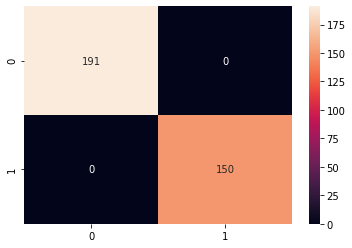

In [ ]:
print_results(calculate_metrics(y_test.values, y_dt), 'Decision Tree test')
cm = confusion_matrix(y_test, y_dt)
sns.heatmap(cm, annot=True, fmt='d')

In [ ]:
from sklearn.ensemble import RandomForestClassifier
randomforest = RandomForestClassifier()
randomforest.fit(X_train, y_train)
y_pred = randomforest.predict(X_test)
acc_randomforest = round(accuracy_score(y_pred, y_test) * 100, 2)
print(acc_randomforest)

100.0


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

          No       1.00      1.00      1.00       191
         Yes       1.00      1.00      1.00       150

    accuracy                           1.00       341
   macro avg       1.00      1.00      1.00       341
weighted avg       1.00      1.00      1.00       341



In [ ]:
print(X_train)

             0         1        2  ...        17        18  EmployeeNumber
909  -0.458919  1.046640 -0.41773  ...  1.067212 -0.998877              52
3603 -0.047772 -0.051527 -0.41773  ...  1.067212 -0.998877            7134
3274 -0.066872 -0.600610 -0.41773  ...  1.067212 -0.998877            6805
238  -0.442489  0.497557 -0.41773  ...  1.067212 -0.998877             335
802  -0.412184 -0.326069 -0.41773  ...  1.067212 -0.998877             857
...        ...       ...      ...  ...       ...       ...             ...
1237 -0.381008 -0.051527 -0.41773  ...  1.067212 -0.998877            1394
3605 -0.047656  0.497557 -0.41773  ...  1.067212 -0.998877            7136
277  -0.447714 -0.875152 -0.41773  ...  1.067212 -0.998877             245
797  -0.455784 -0.326069 -0.41773  ...  1.067212 -0.998877             106
4130 -0.017177 -0.600610 -0.41773  ... -0.937021  1.001124            7661

[1362 rows x 20 columns]


In [ ]:
y_pred.to_csv("y_pred.csv", index=False)

AttributeError: ignored